In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split    
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import joblib
import seaborn as sns

In [3]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<Axes: xlabel='R&D Spend', ylabel='Profit'>

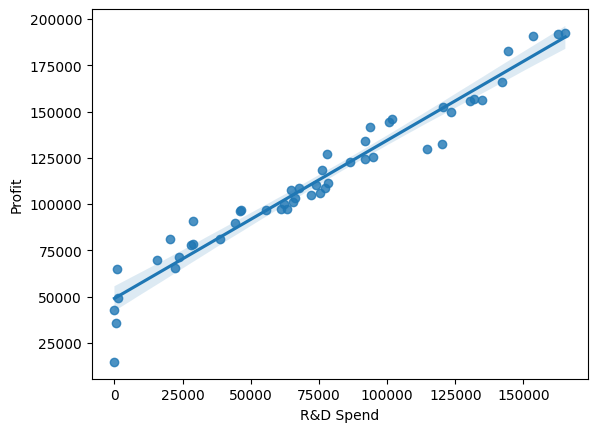

In [4]:
sns.regplot(x='R&D Spend', y='Profit', data=df)

<Axes: xlabel='Administration', ylabel='Profit'>

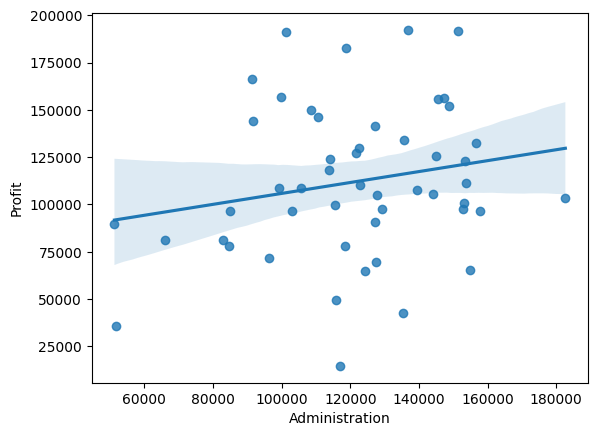

In [5]:
sns.regplot(x='Administration', y='Profit', data=df)

<Axes: xlabel='Marketing Spend', ylabel='Profit'>

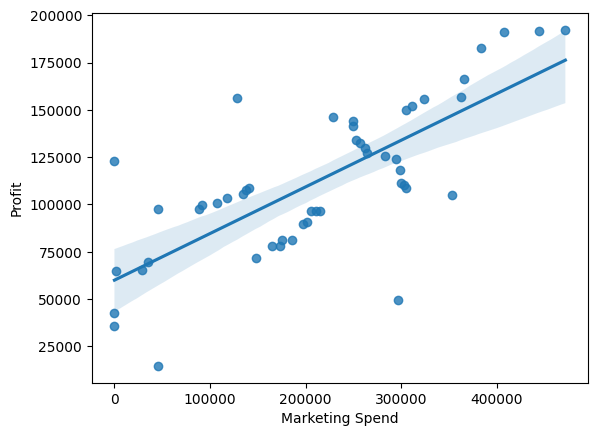

In [6]:
sns.regplot(x='Marketing Spend', y='Profit', data=df)

In [7]:
X = df.drop('Profit', axis=1)
y = df['Profit']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
cat_cols = ['State']
ohe = OneHotEncoder()
X_encoded = ohe.fit_transform(df[cat_cols]).toarray()
X_encoded_df = pd.DataFrame(X_encoded, columns=ohe.get_feature_names_out(cat_cols))

In [10]:
from sklearn.preprocessing import StandardScaler
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[num_cols])
X_scaled_df = pd.DataFrame(X_scaled, columns=num_cols)
X_encoded_df

,State_California,State_Florida,State_New York
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
5,0.0,0.0,1.0
6,1.0,0.0,0.0
7,0.0,1.0,0.0
8,0.0,0.0,1.0
9,1.0,0.0,0.0


In [11]:
#columns concatenation and dropping original columns
dummy_df = pd.concat([X_scaled_df, X_encoded_df], axis=1)

In [12]:
clean_df = pd.concat([df, X_encoded_df], axis=1).drop(cat_cols, axis=1)
clean_df

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,191792.06,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,191050.39,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,182901.99,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,166187.94,0.0,1.0,0.0
5,131876.90,99814.71,362861.36,156991.12,0.0,0.0,1.0
6,134615.46,147198.87,127716.82,156122.51,1.0,0.0,0.0
7,130298.13,145530.06,323876.68,155752.60,0.0,1.0,0.0
8,120542.52,148718.95,311613.29,152211.77,0.0,0.0,1.0
9,123334.88,108679.17,304981.62,149759.96,1.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler
num_cols = df.select_dtypes(include=['int64', float])